<h1 style = "color : Sky blue"> Plotting Exercise(Numpy Attributes)</h1>

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.  

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [2]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data into a dataframe
data = pd.read_csv("data/diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

53940
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040

(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

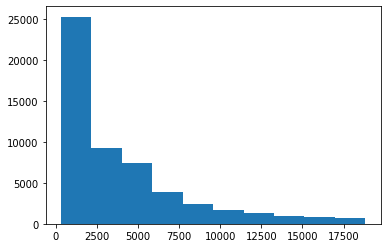

In [23]:
print(data.shape[0])
print(data.describe())

plt.hist(x=data['price'],bins=10)
#plt.boxplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdf9bf27390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdf9bf27c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdf9bf52350>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf9bf41e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf9bf41450>],
 'means': []}

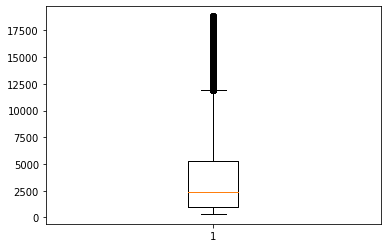

In [21]:
plt.boxplot(data['price'])

- First quartile: Most diamonds (25000) fall in here < 2500

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

<BarContainer object of 5 artists>

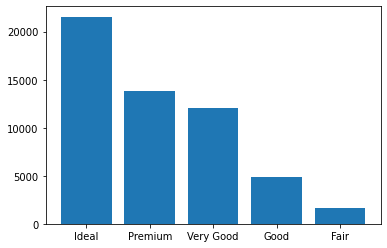

In [41]:
cut_counts = data.value_counts(data['cut']).to_frame()
cut_counts = cut_counts.reset_index()
cut_counts.columns = ['cut','count']
cut_counts.columns

plt.bar(cut_counts['cut'], cut_counts['count'])

<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

([<matplotlib.patches.Wedge at 0x7fdf9f0d2590>,
 [Text(0.3414416126385917, 1.0456661155257725, 'Ideal'),
  Text(-1.0837708252563742, -0.18825726632222606, 'Premium'),
  Text(0.1186760913784701, -1.0935794371398584, 'Very Good'),
  Text(0.9790871199141089, -0.5013864892658114, 'Good'),
  Text(1.0951674706775656, -0.10299617065553196, 'Fair')])

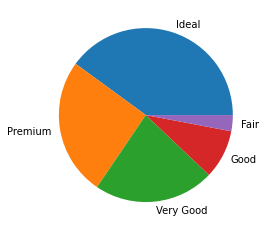

In [43]:
plt.pie(cut_counts['count'], labels = cut_counts['cut'])

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

Text(0, 0.5, 'price')

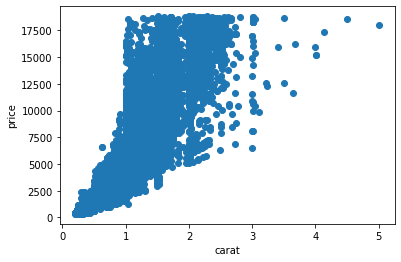

In [46]:
plt.scatter(data['carat'],data['price'])
plt.xlabel('carat');plt.ylabel('price')

<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

<BarContainer object of 5 artists>

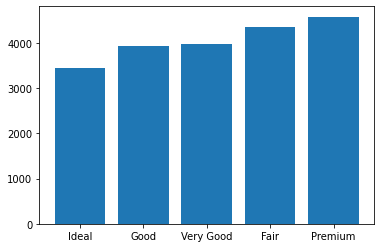

In [68]:
cut_price = data.groupby(by='cut').agg({'price':np.average})
cut_price = cut_price.sort_values(by='price')
cut_price = cut_price.reset_index()
plt.bar(cut_price['cut'],cut_price['price'])

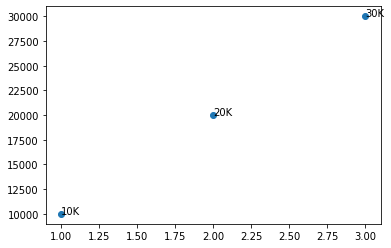

In [54]:
'''
import matplotlib.pyplot as plt
months = [1,2,3]
sales = [10000, 20000, 30000]
plt.scatter(months, sales)
for (month, sales) in zip(months, sales):
    plt.annotate(text = "{}K".format(sales//1000), xy = (month, sales))
'''

**All the best!**